In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
filepath = '/home/derek/Thinkful/Data/yelp_labelled.txt'

yelp_df = pd.read_table(filepath, sep='\t', names=('Comment', 'Sentiment'),
                   dtype={'Comment': np.str, 'Sentiment': np.int64})

In [242]:
yelp_df.head()

,Comment,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [251]:
#Creating features

df2 = yelp_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice', 'regular']

for key in keywords:
    df2[key] = df['Comment'].str.contains(key, case=False)
        
#Create column of comment lengths

for i in range(len(df2['Comment'])):
    df2.loc[i,'length'] = len(df2.loc[i,'Comment'])
    
#Create columns of comment length quartiles, drop length column

df2['len_q1'] = df2.length < df2.length.quantile(0.25)
df2['len_q2'] = (df2.length > df2.length.quantile(0.25)) & (df2.length < df2.length.quantile(0.5))
df2['len_q3'] = (df2.length > df2.length.quantile(0.5)) & (df2.length < df2.length.quantile(0.75))
df2['len_q4'] = df2.length > df2.length.quantile(0.75)

df2.drop(columns='length', inplace=True)

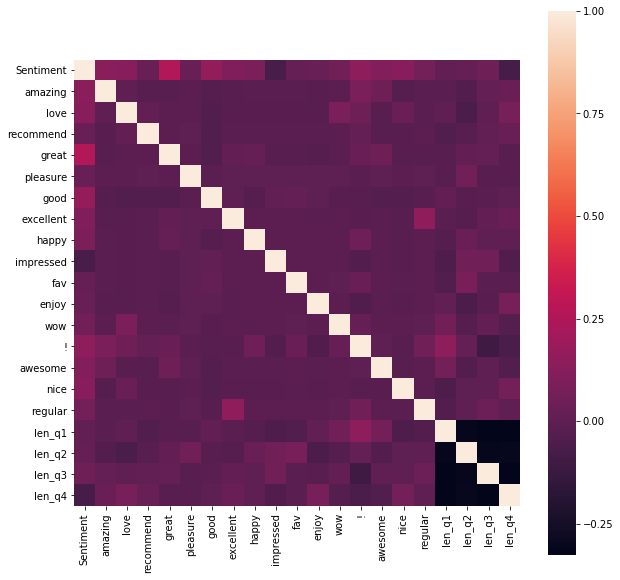

In [245]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

The length quartile variables should have small negative correlations as these features are not independent, these will be included anyways as the correlations are small.

In [252]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords + ['len_q1', 'len_q2', 'len_q3', 'len_q4']]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#Fit data to model
bnb.fit(data, target)

#Make predictions

predicted = bnb.predict(data)

#Test predicted vs actual for each comment in df

accuracy = df2['Sentiment'] == predicted
accuracy.sum()/len(accuracy)*100

71.6

# Testing the classifier against Amazon dataset

In [248]:
filepath = '/home/derek/Thinkful/Data/amazon_cells_labelled.txt'

amazon_df = pd.read_table(filepath, sep='\t', names=('Comment', 'Sentiment'),
                   dtype={'Comment': np.str, 'Sentiment': np.int64})

In [253]:
#Creating features

df2 = amazon_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice', 'regular']

for key in keywords:
    df2[key] = df['Comment'].str.contains(key, case=False)
        
#Create column of comment lengths

for i in range(len(df2['Comment'])):
    df2.loc[i,'length'] = len(df2.loc[i,'Comment'])
    
#Create columns of comment length quartiles, drop length column

df2['len_q1'] = df2.length < df2.length.quantile(0.25)
df2['len_q2'] = (df2.length > df2.length.quantile(0.25)) & (df2.length < df2.length.quantile(0.5))
df2['len_q3'] = (df2.length > df2.length.quantile(0.5)) & (df2.length < df2.length.quantile(0.75))
df2['len_q4'] = df2.length > df2.length.quantile(0.75)

df2.drop(columns='length', inplace=True)

In [254]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords + ['len_q1', 'len_q2', 'len_q3', 'len_q4']]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#Fit data to model
bnb.fit(data, target)

#Make predictions

predicted = bnb.predict(data)

#Test predicted vs actual for each comment in df

accuracy = df2['Sentiment'] == predicted
accuracy.sum()/len(accuracy)*100

56.10000000000001

# Testing the classifier against IMDB dataset

In [255]:
filepath = '/home/derek/Thinkful/Data/imdb_labelled.txt'

imdb_df = pd.read_table(filepath, sep='\t', names=('Comment', 'Sentiment'),
                   dtype={'Comment': np.str, 'Sentiment': np.int64})

In [262]:
#Creating features

df2 = imdb_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice', 'regular']

for key in keywords:
    df2[key] = df['Comment'].str.contains(key, case=False)
        
#Create column of comment lengths

for i in range(len(df2['Comment'])):
    df2.loc[i,'length'] = len(df2.loc[i,'Comment'])
    
#Create columns of comment length quartiles, drop length column

df2['len_q1'] = df2.length < df2.length.quantile(0.25)
df2['len_q2'] = (df2.length > df2.length.quantile(0.25)) & (df2.length < df2.length.quantile(0.5))
df2['len_q3'] = (df2.length > df2.length.quantile(0.5)) & (df2.length < df2.length.quantile(0.75))
df2['len_q4'] = df2.length > df2.length.quantile(0.75)

df2.drop(columns='length', inplace=True)

In [265]:
data = df2[keywords + ['len_q1', 'len_q2', 'len_q3', 'len_q4']]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#Fit data to model
bnb.fit(data, target)

#Make predictions

predicted = bnb.predict(data)

#Test predicted vs actual for each comment in df

accuracy = df2['Sentiment'] == predicted
accuracy.sum()/len(accuracy)*100

55.61497326203209